# **天氣與人工智慧 期中考**
作答完畢請將這份 `.ipynb` 上傳至 LMS 平台，檔名改為 `[學號]姓名.ipynb`，如：`[108681001]周哲維.ipynb`。

## Q1 (15%)
Two tortoises named A and B must run a race. A starts with an average speed of 720 feet per hour. Young B knows she runs faster than A, and furthermore has not finished her cabbage.

When she starts, at last, she can see that A has a 70 feet lead but B's speed is 850 feet per hour. How long will it take B to catch A?

More generally: given two speeds v1 (A's speed, integer > 0) and v2 (B's speed, integer > 0) and a lead g (integer > 0) how long will it take B to catch A?

The result will be an array **[hour, min, sec]** which is the time needed in hours, minutes and seconds (round down to the nearest second) or a string in some languages.

**If v1 >= v2 then return [-1, -1, -1].**

### Code here

In [1]:
def time_transform(sec):
    return [sec//3600, sec%3600//60, int(sec%60)]

def race(v1, v2, g):
    diff = v2 - v1
    return time_transform(g/diff*3600) if diff > 0 else [-1, -1, -1]

### Test

In [2]:
print(race(720, 850, 70)) #[0, 32, 18]
print(race(80, 91, 37)  )#[3, 21, 49]
print(race(80, 100, 40) )#[2, 0, 0]

[0.0, 32.0, 18]
[3.0, 21.0, 49]
[2.0, 0.0, 0]


***

## Q2 (15%)
You live in the city of Cartesia where all roads are laid out in a perfect grid. You arrived ten minutes too early to an appointment, so you decided to take the opportunity to go for a short walk. The city provides its citizens with a Walk Generating App on their phones -- everytime you press the button it sends you an array of one-letter strings representing directions to walk (**eg. ['n', 's', 'w', 'e']**). You always walk only a single block in a direction and you know it takes you one minute to traverse one city block, so create a function that will return true if the walk the app gives you will take you exactly ten minutes (you don't want to be early or late!) and will, of course, return you to your starting point. Return false otherwise.

>Note: you will always receive a valid array containing a random assortment of direction letters ('n', 's', 'e', or 'w' only). It will never give you an empty array (that's not a walk, that's standing still!).

### Code here

In [3]:
def isValidWalk(walk:list):
    return False if len(walk) != 10 else True if walk.count('n') == walk.count('s') and walk.count("w") == walk.count('e') else False

### Test

In [4]:
print(isValidWalk(['n','s','n','w','e','s','n','s','w','e'])        ) #True
print(isValidWalk(['s','s','n','e','e','s','n','s','w','w'])        ) #False
print(isValidWalk(['w','e','n','w','e','s','e','s','w','n','n','s'])) #False

True
False
False


***

## Q3 (15%)
Jaden Smith, the son of Will Smith, is the star of films such as The Karate Kid (2010) and After Earth (2013). Jaden is also known for some of his philosophy that he delivers via [Twitter](https://web.archive.org/web/20190624190255/https:/twitter.com/officialjaden). When writing on Twitter, he is known for almost always capitalizing every word.

Your task is to convert strings to how they would be written by Jaden Smith. The strings are actual quotes from Jaden Smith, but they are not capitalized in the same way he originally typed them.

Example:
>Not Jaden-Cased: "How can mirrors be real if our eyes aren't real"

>Jaden-Cased:     "How Can Mirrors Be Real If Our Eyes Aren't Real"

### Code here

In [5]:
def toJadenCase(string:str):            
    return string[0].upper() + ''.join([string[index] if string[index-1] != " " else string[index].upper() for index in range(1,len(string))])

### Test

In [6]:
quote = "How can mirrors be real if our eyes aren't real"
toJadenCase(quote) #"How Can Mirrors Be Real If Our Eyes Aren't Real"

"How Can Mirrors Be Real If Our Eyes Aren't Real"

***

## Q4 (15%)
given a string, replace every letter with its position in the alphabet.

If anything in the text isn't a letter, ignore it and don't return it.

`"a" = 1` , `"b" = 2` , etc.

Example:

alphabet_position("The sunset sets at twelve o' clock.")

Should return `"20 8 5 19 21 14 19 5 20 19 5 20 19 1 20 20 23 5 12 22 5 15 3 12 15 3 11"` (as a string)

### Code here

In [7]:
def alphabet_position(text:str):
    return ' '.join([str(ord(w.lower())-96) for w in text if w.isalpha()])

### Test

In [8]:
print(alphabet_position("The sunset sets at twelve o' clock.")) # "20 8 5 19 21 14 19 5 20 19 5 20 19 1 20 20 23 5 12 22 5 15 3 12 15 3 11"
print(alphabet_position("The narwhal bacons at midnight.")    ) # "20 8 5 14 1 18 23 8 1 12 2 1 3 15 14 19 1 20 13 9 4 14 9 7 8 20"

20 8 5 19 21 14 19 5 20 19 5 20 19 1 20 20 23 5 12 22 5 15 3 12 15 3 11
20 8 5 14 1 18 23 8 1 12 2 1 3 15 14 19 1 20 13 9 4 14 9 7 8 20


***

## Q5. `466920.csv` 為臺北測站 2017/01/01 ~ 2018/11/30 之觀測資料，`information.txt` 為欄位說明，請完成以下小題。

### Q5-1. 計算 2017 年全年均溫及累積降雨量 (5%)

In [9]:
import pandas as pd

df = pd.read_csv('466920.csv')
df_in_2017 = df[df.year == 2017]
df_with_temp_filter = df_in_2017[df_in_2017.TX01 > -9900]
df_with_prep_filter = df_in_2017[df_in_2017.PP01 > -9900]

year_avg_temp = df_with_temp_filter['TX01'].mean()
year_total_prep = df_with_prep_filter['PP01'].sum()

print(year_avg_temp)
print(year_total_prep)

23.902956621004577
2339.7000000000003


### Q5-2. 計算 2017年 1~12月各月月均溫及累積降雨量 (5%)

In [10]:
import pandas as pd

df = pd.read_csv('466920.csv')
df_in_2017 = df[df.year == 2017]
df_with_temp_filter = df_in_2017[df_in_2017.TX01 > -9900]
df_with_prep_filter = df_in_2017[df_in_2017.PP01 > -9900]

month_avg_temp = [df_with_temp_filter[df_with_temp_filter.month == month]['TX01'].mean() for month in range(1,13)]

month_total_prep = [df_with_prep_filter[df_with_prep_filter.month == month]['PP01'].sum() for month in range(1,13)]

print(month_avg_temp)
print(month_total_prep)

[18.254301075268828, 16.999404761904778, 18.213575268817205, 22.445277777777783, 25.614650537634404, 28.02458333333336, 30.25510752688174, 31.144086021505334, 29.594305555555554, 25.540188172043017, 22.47333333333336, 17.83198924731184]
[21.799999999999997, 123.70000000000002, 182.7, 121.5, 135.5, 649.7, 206.60000000000002, 166.2, 175.6, 368.6, 120.89999999999999, 66.9]


### Q5-3. 找出 2017 年全年最高溫/最低溫及發生時間 (5%)

In [11]:
import pandas as pd

df = pd.read_csv('466920.csv')
df_in_2017 = df[df.year == 2017]
df_with_temp_filter = df_in_2017[df_in_2017.TX01 > -9900]

year_max_temp = df_with_temp_filter['TX01'].max()
year_max_temp_time = df_with_temp_filter[df_with_temp_filter.TX01 == year_max_temp].yyyymmddhh
year_min_temp = df_with_temp_filter['TX01'].min()
year_min_temp_time = df_with_temp_filter[df_with_temp_filter.TX01 == year_min_temp]['yyyymmddhh']

print(year_max_temp)
print(year_max_temp_time)
print(year_min_temp)
print(year_min_temp_time)

38.1
5245    2017080714
Name: yyyymmddhh, dtype: int64
10.5
955    2017020920
966    2017021007
Name: yyyymmddhh, dtype: int64


### Q5-4. 找出 2017 年各月最高溫/最低溫 (5%)

In [12]:
import pandas as pd

df = pd.read_csv('466920.csv')
df_in_2017 = df[df.year == 2017]
df_with_temp_filter = df_in_2017[df_in_2017.TX01 > -9900]

month_max_temp = [df_with_temp_filter[df_with_temp_filter.month == month]['TX01'].max() for month in range(1,13)]
month_min_temp = [df_with_temp_filter[df_with_temp_filter.month == month]['TX01'].min() for month in range(1,13)]

print(month_max_temp)
print(month_min_temp)

[27.2, 27.4, 28.3, 35.2, 34.4, 35.1, 37.5, 38.1, 37.6, 36.0, 31.7, 26.2]
[12.4, 10.5, 12.1, 11.8, 20.0, 22.0, 24.7, 25.5, 23.5, 18.9, 16.3, 12.9]


### Q5-5 將 2017 年各月最高溫/最低溫/平均溫以及各月累積降雨量畫在同一張圖中，溫度用折線，雨量用長條，Y軸要分成主副座標分別給溫度及雨量，給分以圖片資訊完整度(標題、軸文字等等)為考量。 (20%)

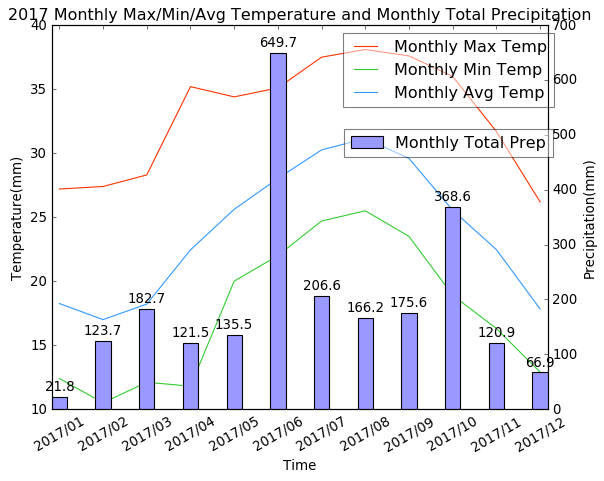

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
import pandas as pd
import time
import matplotlib.style
import matplotlib as mpl
mpl.style.use('classic')

############## Function Define ##############

def autolabel(ax,rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{:4.1f}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

##############################################

############## Global Variables ##############

date_formatter = '%Y %m'
bar_width = 0.35

##############################################

############### Data Process #################

df = pd.read_csv('466920.csv')
df_in_2017 = df[df.year == 2017]
df_with_temp_filter = df_in_2017[df_in_2017.TX01 > -9900]
df_with_prep_filter = df_in_2017[df_in_2017.PP01 > -9900]

month_max_temp = [df_with_temp_filter[df_with_temp_filter.month == month]['TX01'].max() for month in range(1,13)]
month_min_temp = [df_with_temp_filter[df_with_temp_filter.month == month]['TX01'].min() for month in range(1,13)]
month_avg_temp = [df_with_temp_filter[df_with_temp_filter.month == month]['TX01'].mean() for month in range(1,13)]

month_total_prep = [df_with_prep_filter[df_with_prep_filter.month == month]['PP01'].sum() for month in range(1,13)]

timestamp = np.array(["2017/{:02d}".format(month) for month in range(1,13)])

###############################################

############# Plot ##############

plt.rcParams['figure.facecolor'] = 'white'

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

month_max_temp_line = ax1.plot(timestamp, month_max_temp, label='Monthly Max Temp', color="#ff3300")
month_min_temp_line = ax1.plot(timestamp, month_min_temp, label='Monthly Min Temp', color="#33cc33")
month_avg_temp_line = ax1.plot(timestamp, month_avg_temp, label='Monthly Avg Temp', color="#3399ff")
prep_bar = ax2.bar(timestamp, month_total_prep, bar_width, label='Monthly Total Prep', color="#9999ff")

ax1.set_title('2017 Monthly Max/Min/Avg Temperature and Monthly Total Precipitation')
ax1.set_xlabel('Time')
ax1.set_ylabel('Temperature(mm)')
ax2.set_ylabel('Precipitation(mm)')
plt.setp(ax1.get_xticklabels(), rotation=30)

ax1.legend(framealpha=0.5, bbox_to_anchor=(0.8, 1), loc='upper center')
ax2.legend(framealpha=0.5, bbox_to_anchor=(0.8, 0.75), loc='upper center')

autolabel(ax2,prep_bar)

plt.savefig('test.png',dpi=1200)

p.s. Numpy100 網路上太容易找到解答了，拿來考試也沒有太大意義就不出了，祝大家寫得順利！

***